In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

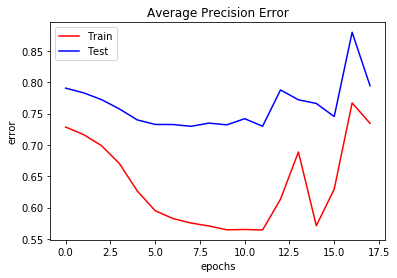

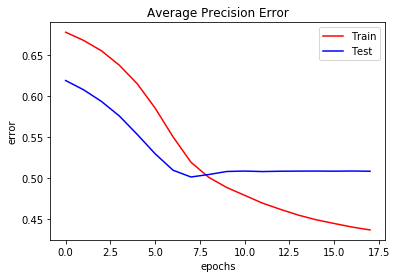

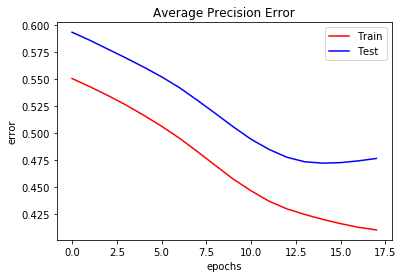

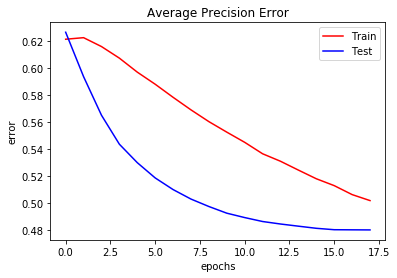

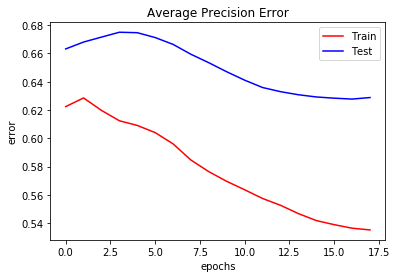

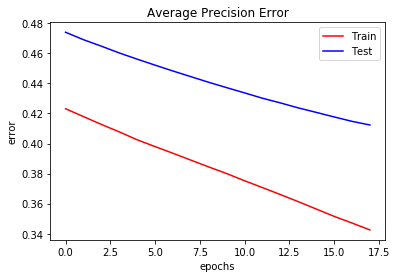

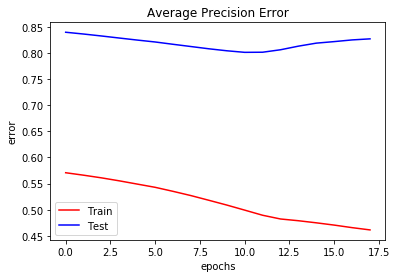

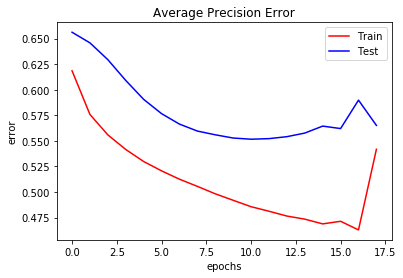

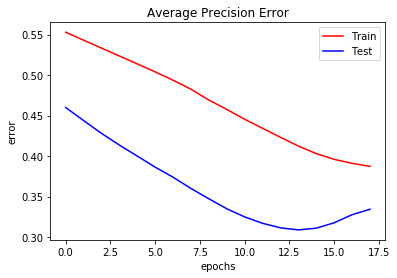

In [8]:
# For ranking
label_list = ['taxi', 'ambulance', 'minivan', 'acoustic_guitar', 'electric_guitar', 'harp', 'wood-frog', 'tree-frog', 'european_fire_salamander' ]
for label in label_list:
    error = pd.read_csv('error_'+label+'.txt', sep=";", header=None)
    error_train = list(error.iloc[0,:])
    error_test = list(error.iloc[1,:])
    size = 18
    curves(error_train, error_test, "Average Precision Error" ,"Train" , "Test", label, size )

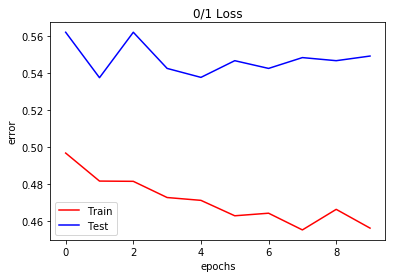

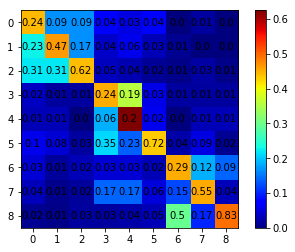

In [16]:
# for classification

label = 'multiclass'
error = pd.read_csv('error.txt', sep=";", header=None)
error_train = list(error.iloc[0,:])
error_test = list(error.iloc[1,:])
curves(error_train, error_test, "0/1 Loss" ,"Train" , "Test", label )

confusion = "confusionNorm_10_iterations1.0E-6_learningRate"
confusion = pd.read_csv(confusion+'.txt', sep=";", header=None)
save_confusion_matrix(confusion)

In [15]:
confusion

,0,1,2,3,4,5,6,7,8
0,0.237643,0.090141,0.090066,0.044371,0.027414,0.039139,0.000000,0.014118,0.002833
1,0.226236,0.473239,0.172185,0.041085,0.059595,0.026419,0.007143,0.002353,0.000000
2,0.311787,0.309859,0.623841,0.046836,0.040524,0.024462,0.007143,0.032941,0.005666
3,0.020913,0.007042,0.011921,0.238291,0.187128,0.034247,0.007143,0.014118,0.005666
4,0.011407,0.009859,0.002649,0.055875,0.203814,0.022505,0.000000,0.007059,0.005666
5,0.100760,0.081690,0.031788,0.351684,0.232420,0.724070,0.042857,0.091765,0.019830
6,0.026616,0.007042,0.018543,0.027938,0.034565,0.021526,0.285714,0.122353,0.093484
7,0.041825,0.009859,0.018543,0.168447,0.174017,0.060665,0.150000,0.548235,0.039660
8,0.022814,0.011268,0.030464,0.025472,0.040524,0.046967,0.500000,0.167059,0.827195


In [ ]:
error_train = list(error.iloc[0,:])
error_test = list(error.iloc[1,:])
curves(error_train, error_test, "Hierarchic Loss" ,"Train" , "Test")

In [4]:
def curves(arr1, arr2, title, lab1, lab2, name, size):
    interval = range(size)
    plt.plot(interval, [arr1[i] for i in interval],color = "red", label = lab1)
    plt.plot(interval, [arr2[i] for i in interval],color = "blue", label = lab2)
    #plt.plot(range(len(arr3)), [arr3[i] for i in range(len(arr3))],color = "green", label = lab3)
    plt.title(title)
    plt.xlabel("epochs")
    plt.ylabel("error")
    plt.legend()
    plt.savefig('rapport/images_error/'+name+'_error.png', format='png')
    plt.show()

In [13]:
def save_confusion_matrix(confusion):
    confusion_np = np.array(confusion)
    confusion_np = confusion_np.round(2)
    #confusionHier_np = np.array(confusionHier)
    conf_arr = confusion_np
    #conf_arr = confusionHier_np

    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                    interpolation='nearest')

    width, height = conf_arr.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

    cb = fig.colorbar(res)
    alphabet = '012345678'
    plt.xticks(range(width), alphabet[:width])
    plt.yticks(range(height), alphabet[:height])
    plt.savefig('confusion_matrix.png', format='png')
    plt.show()